In [2]:
import pandas as pd

In [3]:
CCTV_Seoul = pd.read_csv('../data/01. CCTV_in_Seoul.csv', encoding='utf-8')

In [4]:
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [5]:
#### EUC-KR : 한글완성형, CP949: 한글완성형, UTF-8 : 한글자에 3바이트(유니코드8비트), UTF-16: 한글자에 2바이트(유니코드16비트)

In [6]:
CCTV_Seoul.columns    #칼럼 이름 확인

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [7]:
CCTV_Seoul.columns[0]

'기관명'

In [8]:
CCTV_Seoul.rename(columns = {CCTV_Seoul.columns[0]: '구별'}, inplace = True)     #0번째 칼럽의 이름을 rename을 사용 '구별'로 바꿈
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [9]:
CCTV_Seoul.columns = ['구별', '소계', '2013년도 이전', '2014년', '2015년', '2016년']    # columns 전체를 바꾸는 방법, rename은 하나만 
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [10]:
pop_Seoul = pd.read_excel('../data/01. population_in_Seoul.xls', encoding = 'utf-8')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [11]:
pop_Seoul = pd.read_excel('../data/01. population_in_Seoul.xls',
                          header = 2,                       # 위에 2줄 제외하고 출력
                          parse_cols = 'B, D, G, J, N',     # 구이름, 합계, 한국인합계, 외국인합계, 65세이상합계 만 추출  # usecols
                          encoding = 'utf-8')               # 한글 인코딩
pop_Seoul.head()

C:\Users\A\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  after removing the cwd from sys.path.


,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [12]:
pop_Seoul.rename(columns = {pop_Seoul.columns[0] : '구별',
                           pop_Seoul.columns[1] : '인구수',
                           pop_Seoul.columns[2] : '한국인',
                           pop_Seoul.columns[3] : '외국인',
                           pop_Seoul.columns[4] : '고령자'}, inplace = True)     #칼럼이름 변경, inplace=
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


## CCTV 데이터 정제

In [13]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [14]:
CCTV_Seoul.sort_values(by='소계', ascending = False).head()    # sort정렬, by=소계로, ascending 내림차순

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [15]:
CCTV_Seoul['최근증가율'] = ((CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전'] * 100)
CCTV_Seoul.sort_values(by = '최근증가율', ascending=False).head()     # '최근증가율'칼럼추가 후 최근증가율로 sort

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


## 서울시 인구 데이터 정제

In [16]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [17]:
pop_Seoul.drop([0], inplace = True)  
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [18]:
pop_Seoul['구별'].unique()     #nan

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [19]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [20]:
pop_Seoul.drop([26], inplace = True)     #NaN 행 삭제
pop_Seoul

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0
10,도봉구,348646.0,346629.0,2017.0,51312.0


In [21]:
pop_Seoul

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0
10,도봉구,348646.0,346629.0,2017.0,51312.0


In [22]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [23]:
pop_Seoul.sort_values(by = '인구수', ascending = False).head()     #총 인구수가 가장 많은곳 정렬

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [24]:
pop_Seoul.sort_values(by = '고령자', ascending = False).head()     #고령자가 가장 많은 구 정렬

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [25]:
pop_Seoul.sort_values(by = '외국인', ascending = False).head()    # 외국인이 가장 많은 구 정렬

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


## CCTV 데이터와 인구수 데이터 합치고 분석하기

In [26]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on = '구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [27]:
# drop 행 방향 삭제, del 열방향 삭제
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()


,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [28]:
data_result.set_index('구별', inplace = True)               # 구별로 인덱싱

In [29]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [30]:
# CCTV개수와 고령자 비율은 상관관계가 있는지.
# 상관관계 분석은 확률론과 통계학에서 두 변수간에 어떤 선형적 관계를 가지고 있는지를 분석하는 방법.
# 두 변수는 서로 독립적인 관계로부터 서로 상관된 관계일수 있으며, 이때 두 변수간의 관계의 강도를 상관관계라 함.
# 상관계수 절대값이 0.1이하면 거의무시, 0.3이하면 약한 상관관계, 0.7이상이면 뚜렷한 상관관계.0.3~0.7 양적상관관계, 0.7~1.0 강한 양적상관관계

In [31]:
import numpy as np
np.corrcoef(data_result['고령자비율'], data_result['소계'])
#np.corrcoef -> 컬럼별 데이터의 상관관계를 array 형태로 보여준다.

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [32]:
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [33]:
np.corrcoef(data_result['인구수'], data_result['소계'])     # 0.3 약한 상관관계

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [34]:
data_result.sort_values(by = '소계', ascending = False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


## CCTV와 인구현황 그래프로 분석하기

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system. sorry~~~')
         

In [36]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


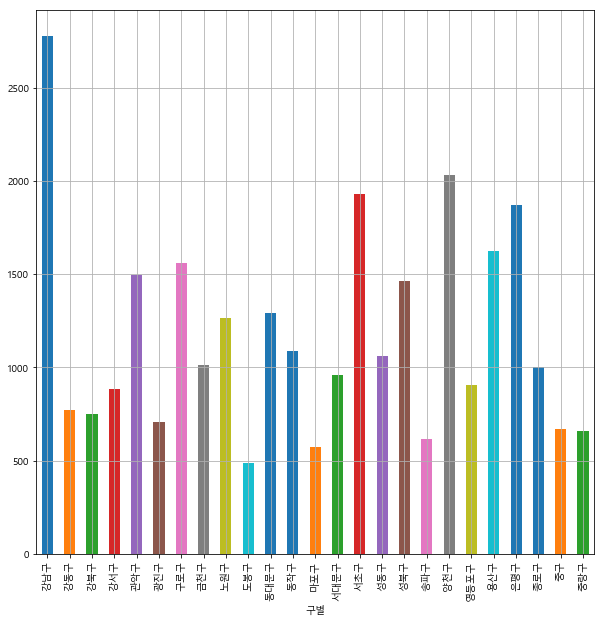

In [37]:
plt.figure()
data_result['소계'].plot(kind = 'bar', grid = True, figsize = (10,10))
plt.show()

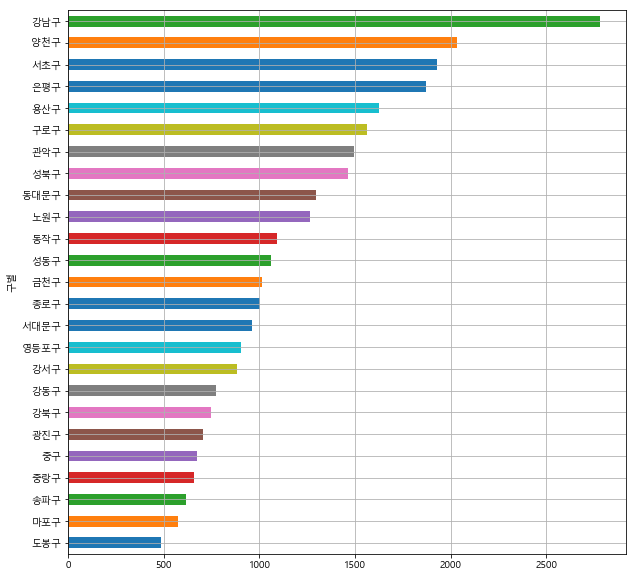

In [106]:
plt.figure()
data_result['소계'].sort_values().plot(kind = 'barh', grid = True, figsize = (10,10))     # sort정렬, barh는 가로로 그래프
plt.show()

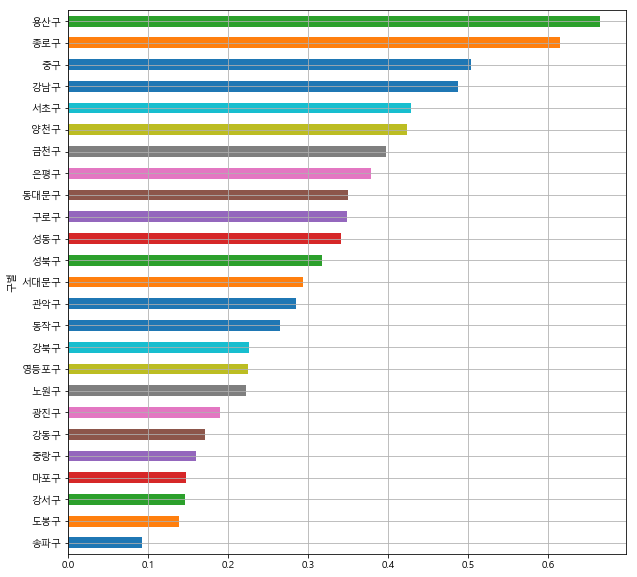

In [40]:
data_result['CCTV비율'] = data_result['소계']/data_result['인구수'] * 100

data_result['CCTV비율'].sort_values().plot(kind = 'barh', grid = True, figsize = (10,10))
#kind = 'barh' -> bar플롯을 수평방향으로 두기 

plt.show()

In [41]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673


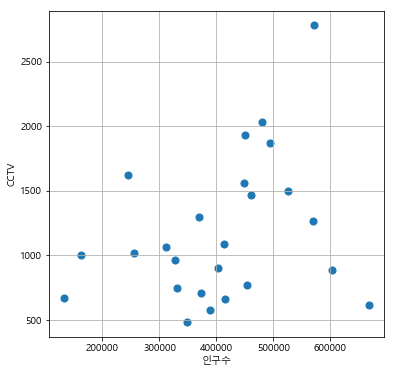

In [43]:
plt.figure(figsize = (6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s = 50)
#인구수 칼럼과 소계 칼럼이 만나는 지점을 s = 50의 산점도로 그려라 
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [45]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'],1)#기울기, 절편, 1차원
#polyfit -> 데이터 피팅을 위한 기능으로, polyfit(x, y, 차수)로 사용한다. 
fp1

array([1.30916415e-03, 6.45066497e+02])

In [46]:
f1 = np.poly1d(fp1) #매개변수로부터 모델 생성
#poly1d -> 매개변수 fp1을 통해 이차방정식을 생성 
fx = np.linspace(100000, 700000, 100)#시작, 끝(포함), 갯수

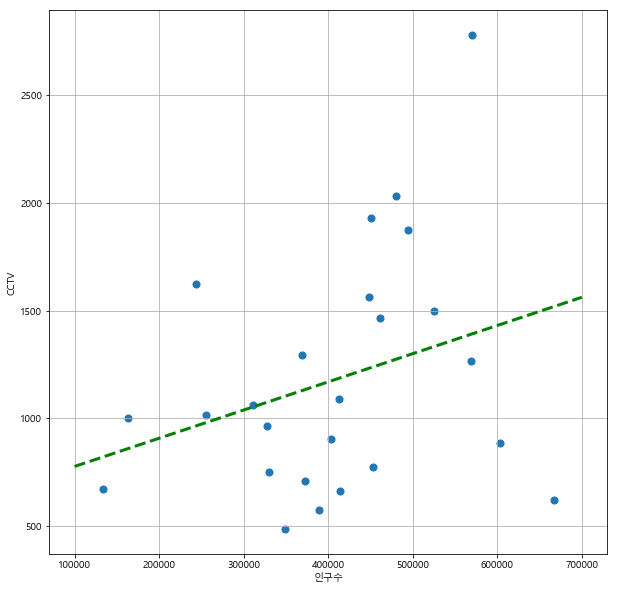

In [48]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s = 50)
plt.plot(fx, f1(fx), ls='dashed', lw = 3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

## 오차를 줄여 좀더 설득력 있는 자료 만들기

In [51]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'],1)#기울기, 절편, 1차원
f1 = np.poly1d(fp1)
fx = np.linspace(100000,700000,100)
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))
#오차란, 산점도 그래프에 그려진 polyfit 평균선과  실제 데이터간의 차이를 뜻함
#np.abs -> 각 성분의 절댓값 계산하기

df_sort = data_result.sort_values(by = '오차', ascending = False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


강남구
송파구
양천구
서초구
용산구
도봉구
마포구
은평구
강서구
중랑구


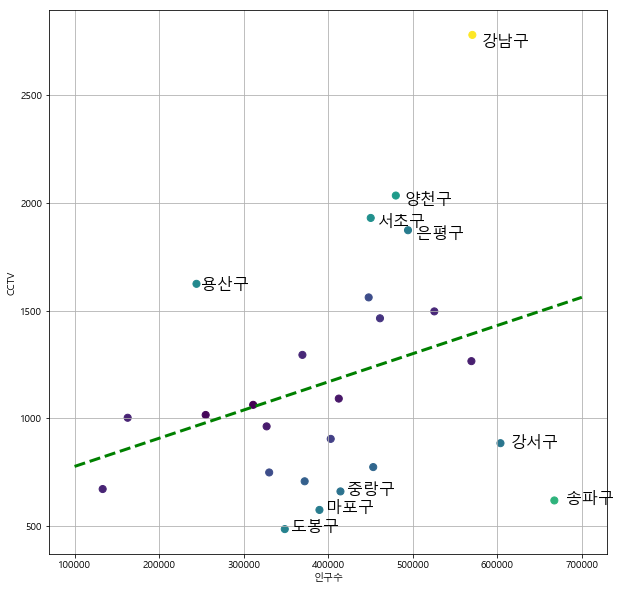

In [94]:
plt.figure(figsize = (10,10))
#x축, y축, 점의 색깔(c)과 크기(s) 
plt.scatter(data_result['인구수'], data_result['소계'], c  = data_result['오차'], s = 50)
plt.plot(fx, f1(fx), ls='dashed', lw = 3, color='g')

#오차가 가장 큰 상위 10개의 구이름을 text화 해서 불러오기 
for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, df_sort.index[n], fontsize = 16)
    #plt.text(x데이터 *(plot의 표시로 부터 떨어진정도), y데이터 * (plot의 표시로 부터 떨어진 정도, 표시할 데이터, fontsize))
    print(df_sort.index[n])
# 현재 plot 으로 사용되고 있는 데이터 셋을 기본 값으로 가져와서, df_sort.index[n]으로 출력하면 내림차순으로 인덱스 명이 출력된다. 
#오차가 가장 큰 상위 10개의 구이름을 text화 해서 불러오기 


plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()